In [45]:
import time
from math import *
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [46]:
def create_start_point(img, map_size):
  x_pos = np.random.randint(low = 3, high = map_size[0]-3, size = 1)
  y_pos = np.random.randint(low = 3, high = map_size[1]-3, size = 1)

  occupied_pos = 255
  while img[y_pos,x_pos,0] == occupied_pos:
    x_pos = np.random.randint(low = 3, high = map_size[0]-3, size = 1)
    y_pos = np.random.randint(low = 3, high = map_size[1]-3, size = 1)

  cv2.rectangle(img, (x_pos-2, y_pos-2), (x_pos+2, y_pos+2), (0,255,0), -1)
  return int(x_pos), int(y_pos)

def create_end_point(img, start_x_pos, start_y_pos, map_size, min_distance):
  x_pos = np.random.randint(low = 3, high = map_size[0]-3, size = 1)
  y_pos = np.random.randint(low = 3, high = map_size[1]-3, size = 1)

  occupied_pos = 255
  while True:
    x_pos = np.random.randint(low = 3, high = map_size[0]-3, size = 1)
    y_pos = np.random.randint(low = 3, high = map_size[1]-3, size = 1)

    if img[y_pos,x_pos,0] != occupied_pos:
      if sqrt(pow( start_x_pos-x_pos,2) + pow(start_y_pos-y_pos,2) ) > float(min_distance):
        break

  cv2.rectangle(img, (x_pos-2, y_pos-2), (x_pos+2, y_pos+2), (0,255,0), -1)
  return int(x_pos), int(y_pos)

def create_rect(img, x_pos, y_pos, width, height):
  cv2.rectangle(img, (x_pos, y_pos), (x_pos+width, y_pos+height), (255,0,0), -1)

In [47]:
# image size
map_width = 100
map_height = 100
map_size = [map_width, map_height]
# generate image
img = np.ones((map_width, map_height, 3), np.uint8)*0

In [48]:
rect_count = 20
rect_min = 5
rect_max = 20
for i in range(rect_count):
  rect_width = np.random.randint(low = rect_min, high = rect_max, size = 1)
  rect_heigth = np.random.randint(low = rect_min, high = rect_max, size = 1)
  pos = np.random.randint(low = 0, high = map_width-rect_width, size = 4)
  create_rect(img, pos[0], pos[1], rect_width, rect_heigth)

start_x_pos, start_y_pos = create_start_point(img, map_size)
end_x_pos, end_y_pos = create_end_point(img, start_x_pos, start_y_pos, map_size, min_distance=65)

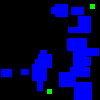

In [49]:
cv2_imshow(img)

['map_0.png', '76', '84', '16', '37']


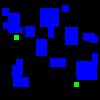

['map_1.png', '5', '39', '82', '88']


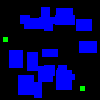

['map_2.png', '94', '42', '5', '69']


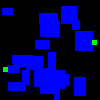

['map_3.png', '92', '78', '22', '20']


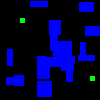

['map_4.png', '32', '86', '46', '17']


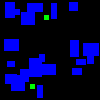

['map_5.png', '84', '37', '15', '90']


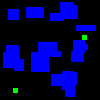

['map_6.png', '49', '44', '96', '90']


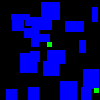

['map_7.png', '30', '31', '95', '82']


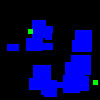

['map_8.png', '82', '90', '4', '16']


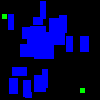

['map_9.png', '94', '58', '14', '71']


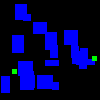

['map_10.png', '51', '63', '96', '14']


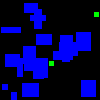

['map_11.png', '88', '3', '34', '57']


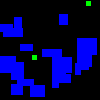

['map_12.png', '27', '8', '94', '23']


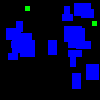

['map_13.png', '38', '60', '86', '4']


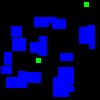

['map_14.png', '68', '58', '4', '10']


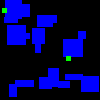

['map_15.png', '59', '49', '6', '10']


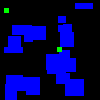

['map_16.png', '28', '6', '94', '40']


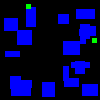

['map_17.png', '94', '14', '60', '70']


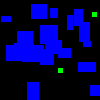

['map_18.png', '44', '7', '77', '76']


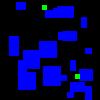

['map_19.png', '60', '86', '7', '22']


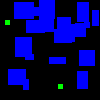

['map_20.png', '15', '79', '89', '29']


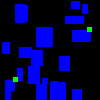

['map_21.png', '61', '33', '41', '96']


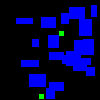

['map_22.png', '69', '13', '11', '47']


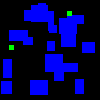

['map_23.png', '81', '6', '11', '12']


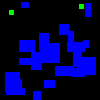

['map_24.png', '84', '7', '87', '80']


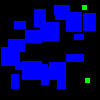

['map_25.png', '4', '83', '57', '39']


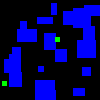

['map_26.png', '66', '31', '32', '92']


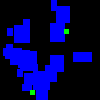

['map_27.png', '32', '28', '89', '77']


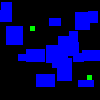

['map_28.png', '34', '36', '82', '92']


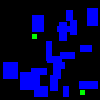

['map_29.png', '21', '30', '86', '52']


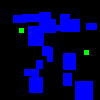

['map_30.png', '57', '24', '21', '93']


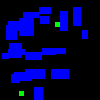

['map_31.png', '36', '29', '79', '85']


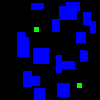

['map_32.png', '19', '96', '84', '37']


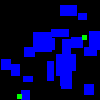

['map_33.png', '78', '76', '24', '37']


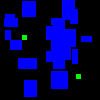

['map_34.png', '19', '82', '68', '9']


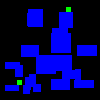

['map_35.png', '43', '20', '42', '94']


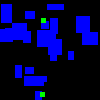

['map_36.png', '26', '43', '93', '10']


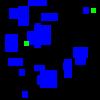

['map_37.png', '93', '65', '47', '14']


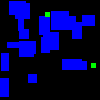

['map_38.png', '63', '73', '24', '11']


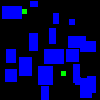

['map_39.png', '79', '69', '8', '5']


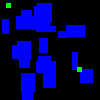

['map_40.png', '34', '87', '34', '11']


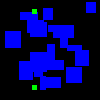

['map_41.png', '72', '57', '4', '89']


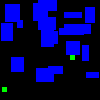

['map_42.png', '53', '61', '93', '8']


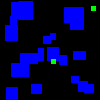

['map_43.png', '43', '66', '93', '4']


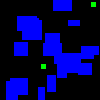

['map_44.png', '6', '27', '82', '32']


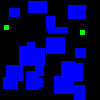

['map_45.png', '86', '19', '19', '64']


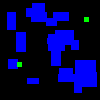

['map_46.png', '94', '15', '29', '84']


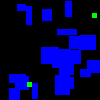

['map_47.png', '73', '30', '3', '61']


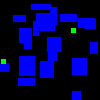

['map_48.png', '28', '82', '67', '22']


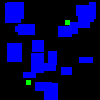

['map_49.png', '16', '37', '94', '41']


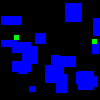

['map_50.png', '85', '96', '42', '41']


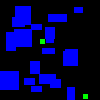

['map_51.png', '24', '84', '94', '69']


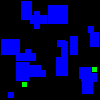

['map_52.png', '14', '29', '74', '72']


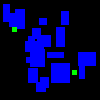

['map_53.png', '96', '34', '8', '39']


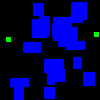

['map_54.png', '7', '46', '93', '73']


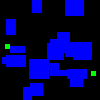

['map_55.png', '42', '75', '40', '4']


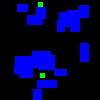

['map_56.png', '36', '84', '16', '5']


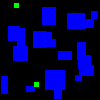

['map_57.png', '72', '50', '7', '20']


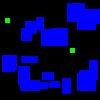

['map_58.png', '76', '34', '7', '28']


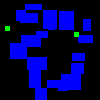

['map_59.png', '54', '7', '7', '52']


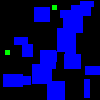

['map_60.png', '94', '94', '7', '29']


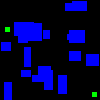

['map_61.png', '22', '92', '78', '3']


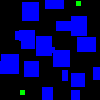

['map_62.png', '36', '4', '84', '82']


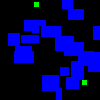

['map_63.png', '6', '89', '87', '78']


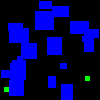

['map_64.png', '94', '77', '38', '37']


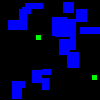

['map_65.png', '92', '55', '14', '11']


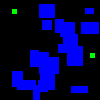

['map_66.png', '87', '27', '8', '72']


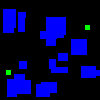

['map_67.png', '67', '95', '45', '19']


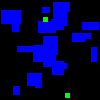

['map_68.png', '18', '70', '89', '36']


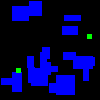

['map_69.png', '86', '35', '15', '70']


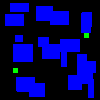

['map_70.png', '70', '69', '11', '15']


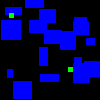

['map_71.png', '67', '6', '29', '78']


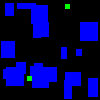

['map_72.png', '82', '70', '29', '27']


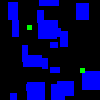

['map_73.png', '93', '37', '28', '28']


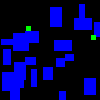

['map_74.png', '14', '54', '72', '16']


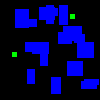

['map_75.png', '12', '95', '55', '23']


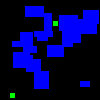

['map_76.png', '41', '50', '91', '95']


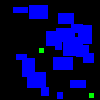

['map_77.png', '76', '95', '94', '3']


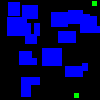

['map_78.png', '7', '49', '86', '7']


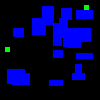

['map_79.png', '62', '77', '49', '12']


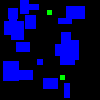

['map_80.png', '89', '47', '11', '34']


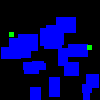

['map_81.png', '58', '8', '35', '76']


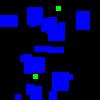

['map_82.png', '62', '59', '5', '24']


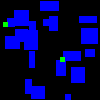

['map_83.png', '25', '46', '80', '90']


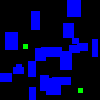

['map_84.png', '93', '91', '11', '65']


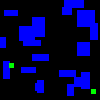

['map_85.png', '67', '8', '10', '74']


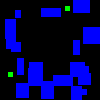

['map_86.png', '9', '64', '94', '49']


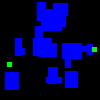

['map_87.png', '50', '8', '12', '90']


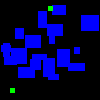

['map_88.png', '10', '45', '87', '40']


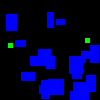

['map_89.png', '81', '79', '11', '10']


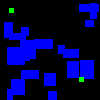

['map_90.png', '32', '35', '93', '73']


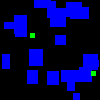

['map_91.png', '72', '52', '15', '11']


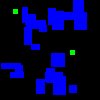

['map_92.png', '92', '51', '22', '79']


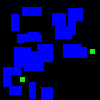

['map_93.png', '7', '31', '69', '74']


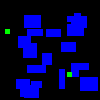

['map_94.png', '79', '68', '7', '62']


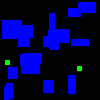

['map_95.png', '62', '57', '5', '3']


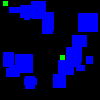

['map_96.png', '79', '90', '15', '38']


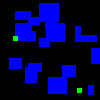

['map_97.png', '71', '79', '26', '9']


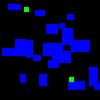

['map_98.png', '51', '57', '5', '7']


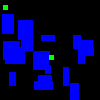

['map_99.png', '48', '57', '86', '3']


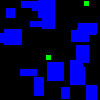

['map_100.png', '66', '78', '47', '12']


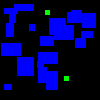

['map_101.png', '36', '56', '83', '6']


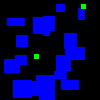

['map_102.png', '79', '84', '50', '12']


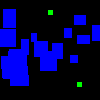

['map_103.png', '3', '27', '30', '94']


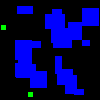

['map_104.png', '4', '51', '66', '14']


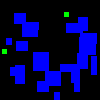

['map_105.png', '21', '18', '66', '94']


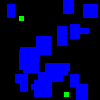

['map_106.png', '5', '96', '96', '68']


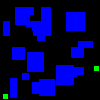

['map_107.png', '85', '62', '13', '24']


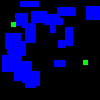

['map_108.png', '43', '73', '86', '14']


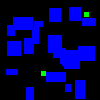

['map_109.png', '23', '15', '3', '81']


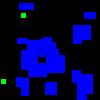

['map_110.png', '74', '58', '21', '7']


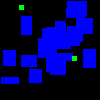

['map_111.png', '29', '93', '45', '23']


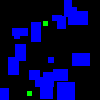

['map_112.png', '5', '16', '75', '3']


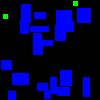

['map_113.png', '86', '46', '18', '95']


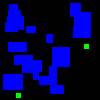

['map_114.png', '55', '42', '4', '85']


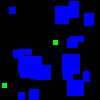

['map_115.png', '3', '73', '89', '34']


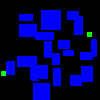

['map_116.png', '21', '35', '87', '49']


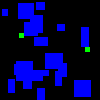

['map_117.png', '21', '72', '76', '15']


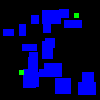

['map_118.png', '20', '25', '89', '17']


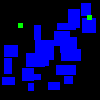

['map_119.png', '54', '71', '95', '10']


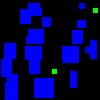

['map_120.png', '30', '15', '95', '60']


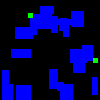

['map_121.png', '12', '7', '78', '93']


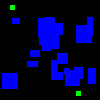

['map_122.png', '15', '84', '96', '42']


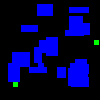

['map_123.png', '90', '95', '87', '6']


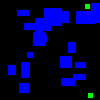

['map_124.png', '19', '50', '82', '93']


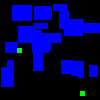

['map_125.png', '69', '15', '39', '74']


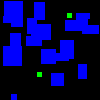

['map_126.png', '47', '80', '70', '15']


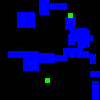

['map_127.png', '20', '94', '9', '19']


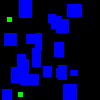

['map_128.png', '91', '67', '3', '70']


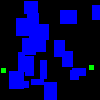

['map_129.png', '74', '73', '4', '53']


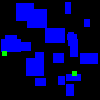

['map_130.png', '22', '9', '95', '54']


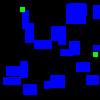

['map_131.png', '70', '69', '90', '4']


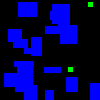

['map_132.png', '57', '50', '4', '11']


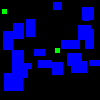

['map_133.png', '12', '92', '37', '5']


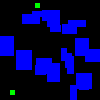

['map_134.png', '87', '44', '14', '30']


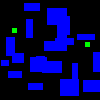

['map_135.png', '63', '67', '13', '19']


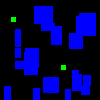

['map_136.png', '26', '59', '95', '63']


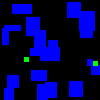

['map_137.png', '11', '92', '96', '13']


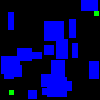

['map_138.png', '83', '10', '26', '69']


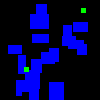

['map_139.png', '52', '27', '40', '94']


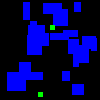

['map_140.png', '74', '74', '63', '8']


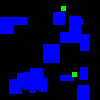

['map_141.png', '96', '38', '40', '88']


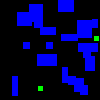

['map_142.png', '44', '49', '91', '94']


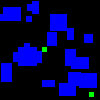

['map_143.png', '50', '95', '26', '13']


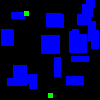

['map_144.png', '51', '66', '11', '4']


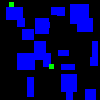

['map_145.png', '7', '11', '89', '14']


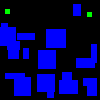

['map_146.png', '39', '74', '11', '3']


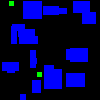

['map_147.png', '89', '96', '13', '55']


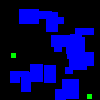

['map_148.png', '52', '29', '96', '84']


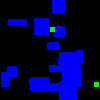

['map_149.png', '61', '75', '48', '6']


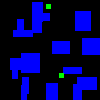

['map_150.png', '21', '78', '92', '22']


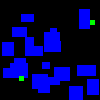

['map_151.png', '15', '21', '84', '51']


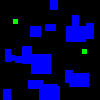

['map_152.png', '75', '80', '35', '8']


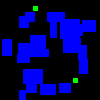

['map_153.png', '87', '32', '27', '93']


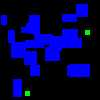

['map_154.png', '49', '53', '96', '4']


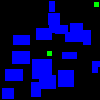

['map_155.png', '64', '9', '33', '91']


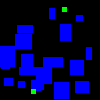

['map_156.png', '4', '87', '41', '6']


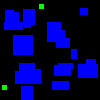

['map_157.png', '79', '95', '59', '10']


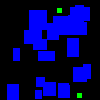

['map_158.png', '78', '67', '25', '21']


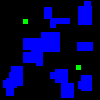

['map_159.png', '56', '79', '9', '26']


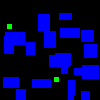

['map_160.png', '18', '44', '85', '92']


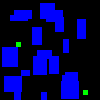

['map_161.png', '17', '53', '81', '88']


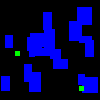

['map_162.png', '84', '47', '7', '87']


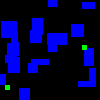

['map_163.png', '30', '77', '82', '37']


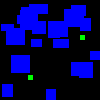

['map_164.png', '4', '36', '96', '12']


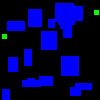

['map_165.png', '48', '73', '12', '3']


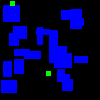

['map_166.png', '13', '51', '95', '29']


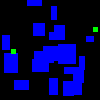

['map_167.png', '46', '12', '20', '87']


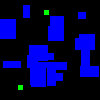

['map_168.png', '11', '23', '80', '28']


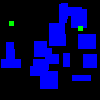

['map_169.png', '14', '81', '82', '78']


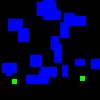

['map_170.png', '39', '67', '12', '5']


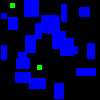

['map_171.png', '36', '9', '9', '91']


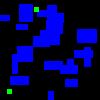

['map_172.png', '14', '84', '93', '58']


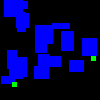

['map_173.png', '48', '29', '95', '85']


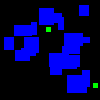

['map_174.png', '84', '7', '23', '57']


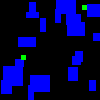

['map_175.png', '61', '65', '5', '31']


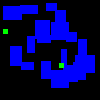

['map_176.png', '28', '85', '81', '23']


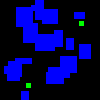

['map_177.png', '59', '5', '31', '66']


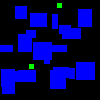

['map_178.png', '94', '80', '96', '5']


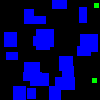

['map_179.png', '84', '43', '6', '77']


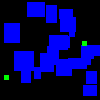

['map_180.png', '4', '83', '95', '61']


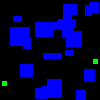

['map_181.png', '27', '17', '62', '85']


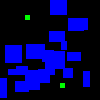

['map_182.png', '36', '64', '87', '14']


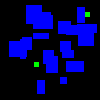

['map_183.png', '6', '66', '30', '3']


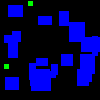

['map_184.png', '96', '15', '90', '92']


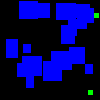

['map_185.png', '5', '47', '88', '26']


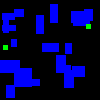

['map_186.png', '22', '42', '84', '96']


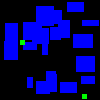

['map_187.png', '11', '44', '76', '58']


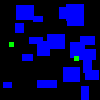

['map_188.png', '40', '39', '81', '90']


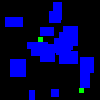

['map_189.png', '68', '16', '31', '81']


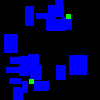

['map_190.png', '9', '22', '59', '73']


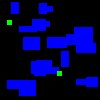

['map_191.png', '33', '13', '9', '92']


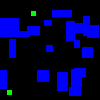

['map_192.png', '14', '34', '62', '95']


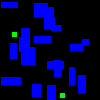

['map_193.png', '36', '13', '7', '92']


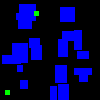

['map_194.png', '78', '93', '45', '5']


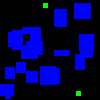

['map_195.png', '24', '57', '93', '26']


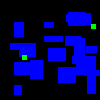

['map_196.png', '25', '48', '88', '76']


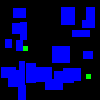

['map_197.png', '38', '66', '73', '4']


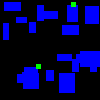

['map_198.png', '82', '93', '29', '19']


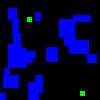

['map_199.png', '16', '25', '3', '96']


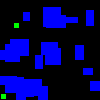

['map_200.png', '69', '44', '9', '9']


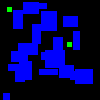

['map_201.png', '94', '3', '34', '76']


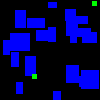

['map_202.png', '23', '16', '54', '80']


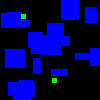

['map_203.png', '60', '28', '3', '81']


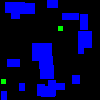

['map_204.png', '49', '52', '93', '3']


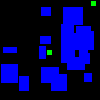

['map_205.png', '70', '66', '3', '52']


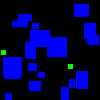

['map_206.png', '31', '79', '96', '74']


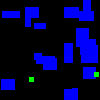

['map_207.png', '68', '26', '46', '93']


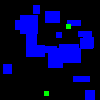

['map_208.png', '6', '61', '89', '53']


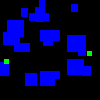

['map_209.png', '40', '18', '88', '67']


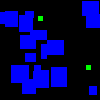

['map_210.png', '85', '56', '15', '13']


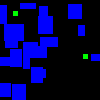

['map_211.png', '49', '27', '55', '96']


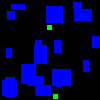

['map_212.png', '33', '15', '63', '85']


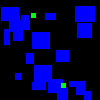

['map_213.png', '18', '83', '90', '54']


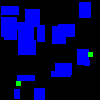

['map_214.png', '7', '88', '48', '31']


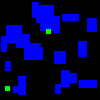

['map_215.png', '89', '65', '23', '92']


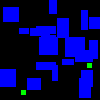

['map_216.png', '77', '29', '91', '93']


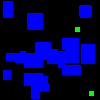

['map_217.png', '37', '57', '79', '5']


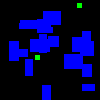

['map_218.png', '21', '83', '96', '19']


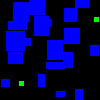

['map_219.png', '9', '96', '73', '67']


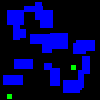

['map_220.png', '84', '26', '24', '72']


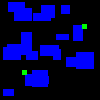

['map_221.png', '57', '24', '34', '91']


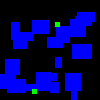

['map_222.png', '5', '38', '84', '75']


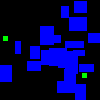

['map_223.png', '85', '84', '13', '25']


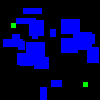

['map_224.png', '23', '33', '85', '95']


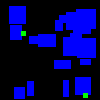

['map_225.png', '5', '12', '74', '9']


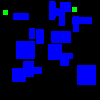

['map_226.png', '45', '96', '67', '22']


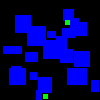

['map_227.png', '55', '73', '82', '3']


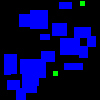

['map_228.png', '84', '74', '17', '69']


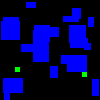

['map_229.png', '48', '66', '6', '14']


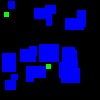

['map_230.png', '22', '42', '94', '55']


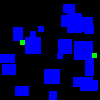

['map_231.png', '59', '73', '29', '9']


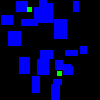

['map_232.png', '11', '16', '55', '95']


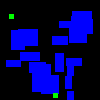

['map_233.png', '67', '72', '17', '8']


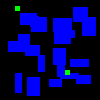

['map_234.png', '7', '78', '90', '91']


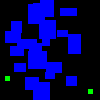

['map_235.png', '46', '67', '95', '6']


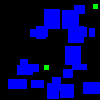

['map_236.png', '77', '84', '22', '29']


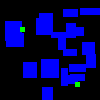

['map_237.png', '15', '7', '18', '89']


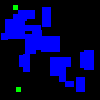

['map_238.png', '26', '11', '14', '92']


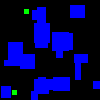

['map_239.png', '91', '22', '30', '94']


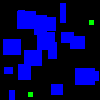

['map_240.png', '36', '45', '92', '11']


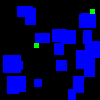

['map_241.png', '39', '45', '96', '12']


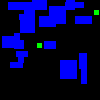

['map_242.png', '23', '75', '93', '64']


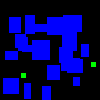

['map_243.png', '38', '60', '92', '11']


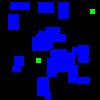

['map_244.png', '80', '25', '15', '80']


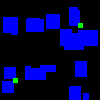

['map_245.png', '15', '7', '77', '57']


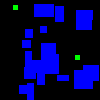

['map_246.png', '82', '37', '23', '9']


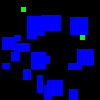

['map_247.png', '35', '32', '69', '88']


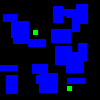

['map_248.png', '5', '68', '91', '14']


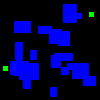

['map_249.png', '85', '86', '25', '27']


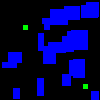

['map_250.png', '27', '12', '91', '70']


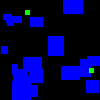

['map_251.png', '20', '89', '47', '22']


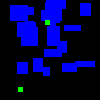

['map_252.png', '4', '74', '95', '70']


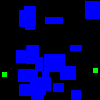

['map_253.png', '18', '77', '72', '35']


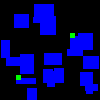

['map_254.png', '69', '73', '15', '3']


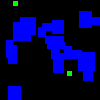

['map_255.png', '45', '35', '10', '92']


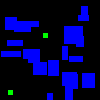

['map_256.png', '9', '18', '95', '93']


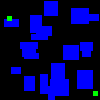

['map_257.png', '71', '59', '9', '20']


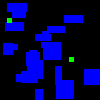

['map_258.png', '34', '39', '96', '19']


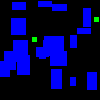

['map_259.png', '13', '64', '78', '4']


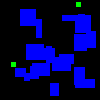

['map_260.png', '66', '4', '72', '74']


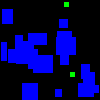

['map_261.png', '88', '7', '42', '68']


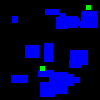

['map_262.png', '4', '19', '82', '88']


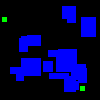

['map_263.png', '25', '20', '93', '11']


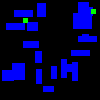

['map_264.png', '48', '42', '8', '96']


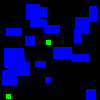

['map_265.png', '66', '95', '58', '8']


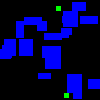

['map_266.png', '93', '27', '28', '52']


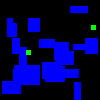

['map_267.png', '60', '74', '12', '29']


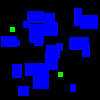

['map_268.png', '48', '34', '10', '90']


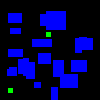

['map_269.png', '91', '76', '45', '17']


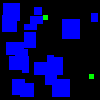

['map_270.png', '8', '41', '89', '34']


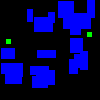

['map_271.png', '92', '15', '27', '12']


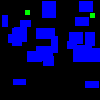

['map_272.png', '38', '24', '14', '91']


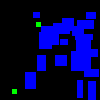

['map_273.png', '13', '81', '75', '11']


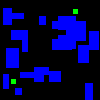

['map_274.png', '58', '30', '39', '93']


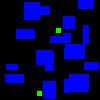

['map_275.png', '53', '5', '43', '81']


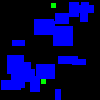

['map_276.png', '41', '88', '80', '35']


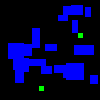

['map_277.png', '91', '60', '18', '55']


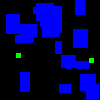

['map_278.png', '89', '82', '24', '9']


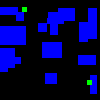

['map_279.png', '89', '9', '37', '96']


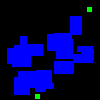

['map_280.png', '29', '5', '49', '79']


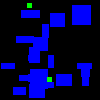

['map_281.png', '84', '55', '11', '84']


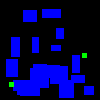

['map_282.png', '71', '32', '8', '92']


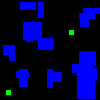

['map_283.png', '33', '66', '94', '27']


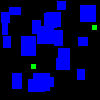

['map_284.png', '80', '87', '12', '12']


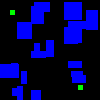

['map_285.png', '24', '67', '73', '4']


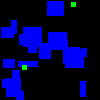

['map_286.png', '10', '21', '88', '66']


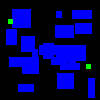

['map_287.png', '33', '30', '90', '96']


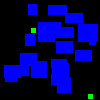

['map_288.png', '80', '78', '13', '3']


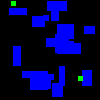

['map_289.png', '53', '85', '95', '13']


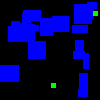

['map_290.png', '65', '7', '5', '96']


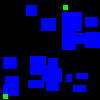

['map_291.png', '28', '14', '55', '80']


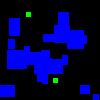

['map_292.png', '44', '90', '49', '4']


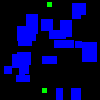

['map_293.png', '24', '35', '85', '5']


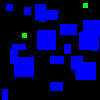

['map_294.png', '73', '89', '73', '7']


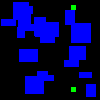

['map_295.png', '51', '62', '8', '7']


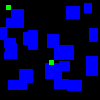

['map_296.png', '12', '36', '87', '65']


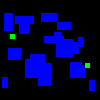

['map_297.png', '45', '82', '75', '18']


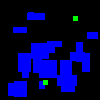

['map_298.png', '30', '8', '10', '78']


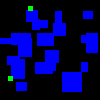

['map_299.png', '92', '87', '16', '70']


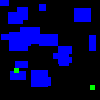

['map_300.png', '96', '6', '23', '12']


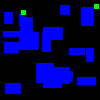

['map_301.png', '76', '73', '11', '28']


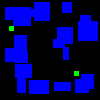

['map_302.png', '27', '3', '83', '95']


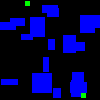

['map_303.png', '45', '26', '27', '89']


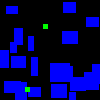

['map_304.png', '79', '47', '4', '17']


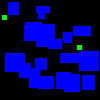

['map_305.png', '35', '12', '43', '81']


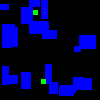

['map_306.png', '46', '85', '93', '17']


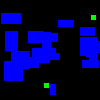

['map_307.png', '21', '59', '89', '67']


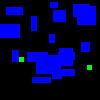

['map_308.png', '3', '22', '94', '84']


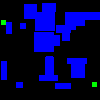

['map_309.png', '18', '50', '84', '91']


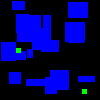

['map_310.png', '4', '24', '96', '3']


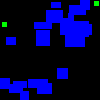

['map_311.png', '27', '52', '93', '33']


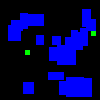

['map_312.png', '47', '35', '7', '90']


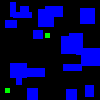

['map_313.png', '76', '50', '5', '49']


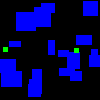

['map_314.png', '71', '67', '24', '11']


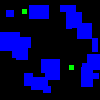

['map_315.png', '65', '57', '6', '91']


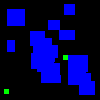

['map_316.png', '15', '18', '93', '76']


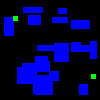

['map_317.png', '90', '26', '42', '92']


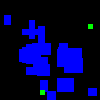

['map_318.png', '49', '54', '93', '6']


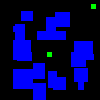

['map_319.png', '87', '56', '22', '95']


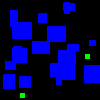

['map_320.png', '35', '64', '92', '18']


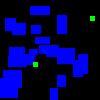

['map_321.png', '14', '25', '17', '94']


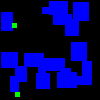

['map_322.png', '14', '86', '71', '3']


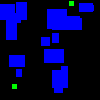

['map_323.png', '43', '84', '89', '5']


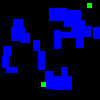

['map_324.png', '37', '83', '95', '18']


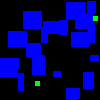

['map_325.png', '12', '13', '71', '43']


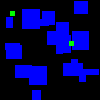

['map_326.png', '3', '95', '63', '43']


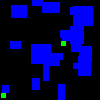

['map_327.png', '53', '53', '3', '6']


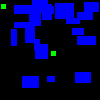

['map_328.png', '25', '70', '80', '3']


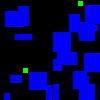

['map_329.png', '76', '62', '9', '80']


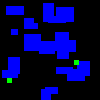

['map_330.png', '81', '59', '8', '42']


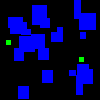

['map_331.png', '3', '17', '43', '86']


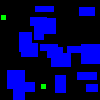

['map_332.png', '18', '10', '91', '69']


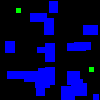

['map_333.png', '79', '96', '86', '7']


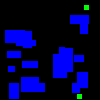

['map_334.png', '84', '67', '16', '55']


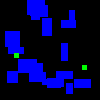

['map_335.png', '9', '60', '51', '9']


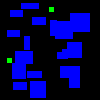

['map_336.png', '66', '84', '96', '11']


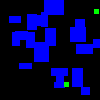

['map_337.png', '14', '53', '74', '12']


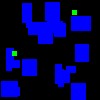

['map_338.png', '23', '65', '63', '6']


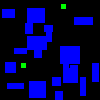

['map_339.png', '31', '39', '88', '89']


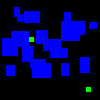

['map_340.png', '42', '24', '78', '88']


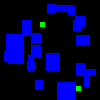

['map_341.png', '43', '95', '11', '4']


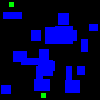

['map_342.png', '40', '91', '53', '20']


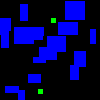

['map_343.png', '13', '18', '86', '90']


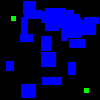

['map_344.png', '93', '20', '9', '11']


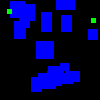

['map_345.png', '68', '30', '19', '89']


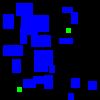

['map_346.png', '94', '38', '21', '80']


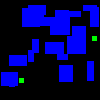

['map_347.png', '61', '30', '55', '96']


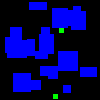

['map_348.png', '18', '30', '86', '44']


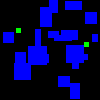

['map_349.png', '41', '72', '87', '9']


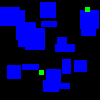

['map_350.png', '90', '86', '33', '3']


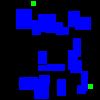

['map_351.png', '58', '54', '4', '16']


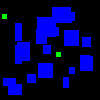

['map_352.png', '45', '77', '31', '5']


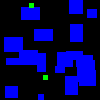

['map_353.png', '52', '23', '31', '88']


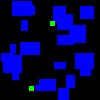

['map_354.png', '91', '89', '83', '12']


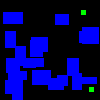

['map_355.png', '60', '69', '24', '12']


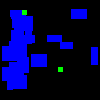

['map_356.png', '46', '96', '60', '32']


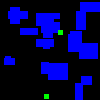

['map_357.png', '13', '17', '56', '67']


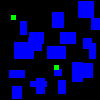

['map_358.png', '4', '10', '89', '60']


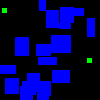

['map_359.png', '55', '39', '4', '80']


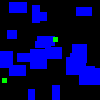

['map_360.png', '82', '39', '8', '59']


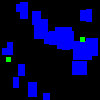

['map_361.png', '45', '94', '94', '16']


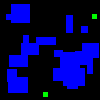

['map_362.png', '27', '53', '93', '38']


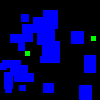

['map_363.png', '53', '52', '3', '95']


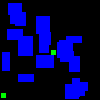

['map_364.png', '95', '86', '47', '32']


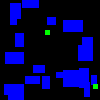

['map_365.png', '16', '30', '93', '29']


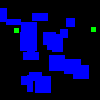

['map_366.png', '40', '76', '77', '16']


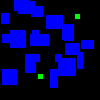

['map_367.png', '53', '70', '80', '3']


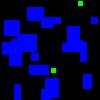

['map_368.png', '83', '34', '16', '59']


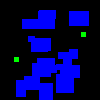

['map_369.png', '53', '67', '10', '7']


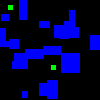

['map_370.png', '21', '28', '66', '82']


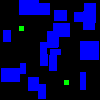

['map_371.png', '31', '61', '96', '41']


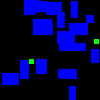

['map_372.png', '71', '63', '22', '15']


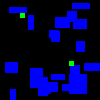

['map_373.png', '50', '77', '8', '20']


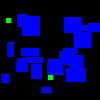

['map_374.png', '84', '55', '5', '44']


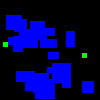

['map_375.png', '20', '50', '77', '90']


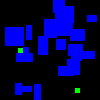

['map_376.png', '51', '47', '3', '95']


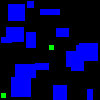

['map_377.png', '46', '69', '88', '3']


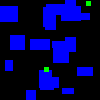

['map_378.png', '12', '57', '82', '96']


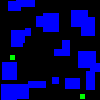

['map_379.png', '3', '84', '77', '14']


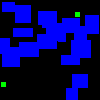

['map_380.png', '50', '66', '95', '5']


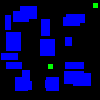

['map_381.png', '65', '15', '49', '92']


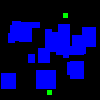

['map_382.png', '93', '60', '44', '7']


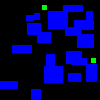

['map_383.png', '86', '84', '89', '19']


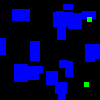

['map_384.png', '82', '95', '41', '41']


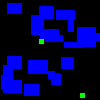

['map_385.png', '25', '19', '31', '95']


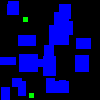

['map_386.png', '35', '95', '45', '19']


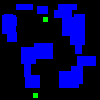

['map_387.png', '41', '43', '96', '91']


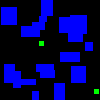

['map_388.png', '78', '35', '24', '81']


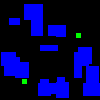

['map_389.png', '29', '4', '49', '87']


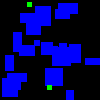

['map_390.png', '92', '51', '28', '94']


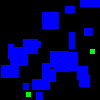

['map_391.png', '28', '41', '89', '68']


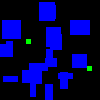

['map_392.png', '95', '33', '50', '90']


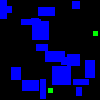

['map_393.png', '22', '30', '85', '7']


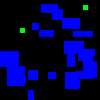

['map_394.png', '59', '78', '12', '15']


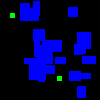

['map_395.png', '39', '57', '86', '8']


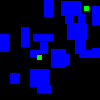

['map_396.png', '51', '96', '53', '9']


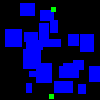

['map_397.png', '58', '83', '60', '12']


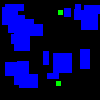

['map_398.png', '84', '40', '3', '81']


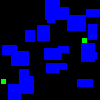

['map_399.png', '6', '33', '46', '91']


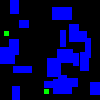

['map_400.png', '23', '57', '77', '4']


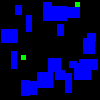

['map_401.png', '84', '30', '20', '95']


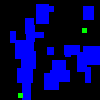

['map_402.png', '83', '39', '3', '23']


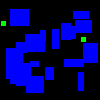

['map_403.png', '36', '96', '78', '30']


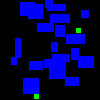

['map_404.png', '56', '6', '30', '85']


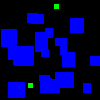

['map_405.png', '3', '65', '61', '9']


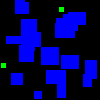

['map_406.png', '76', '92', '34', '32']


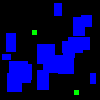

['map_407.png', '29', '37', '87', '3']


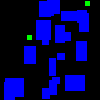

['map_408.png', '94', '59', '8', '63']


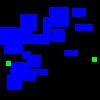

['map_409.png', '74', '17', '73', '95']


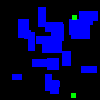

['map_410.png', '24', '14', '62', '86']


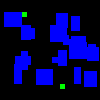

['map_411.png', '78', '8', '4', '39']


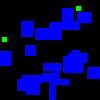

['map_412.png', '37', '80', '93', '14']


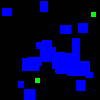

['map_413.png', '45', '30', '17', '94']


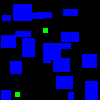

['map_414.png', '70', '79', '14', '28']


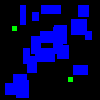

['map_415.png', '49', '6', '94', '63']


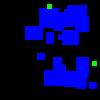

['map_416.png', '53', '96', '17', '36']


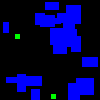

['map_417.png', '40', '9', '73', '89']


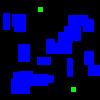

['map_418.png', '95', '28', '19', '8']


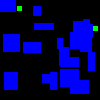

['map_419.png', '48', '46', '4', '95']


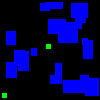

['map_420.png', '23', '55', '81', '9']


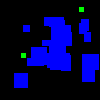

['map_421.png', '48', '42', '94', '96']


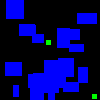

['map_422.png', '62', '64', '4', '31']


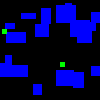

['map_423.png', '90', '91', '41', '17']


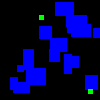

['map_424.png', '69', '22', '4', '17']


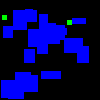

['map_425.png', '35', '80', '65', '6']


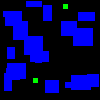

['map_426.png', '77', '40', '16', '13']


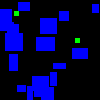

['map_427.png', '53', '68', '4', '4']


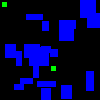

['map_428.png', '79', '15', '47', '73']


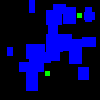

['map_429.png', '58', '23', '82', '92']


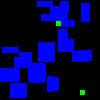

['map_430.png', '32', '47', '81', '4']


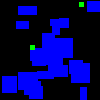

['map_431.png', '7', '84', '69', '62']


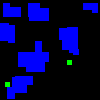

['map_432.png', '43', '94', '84', '12']


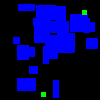

['map_433.png', '88', '79', '69', '4']


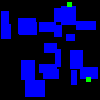

['map_434.png', '39', '5', '78', '84']


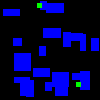

['map_435.png', '43', '13', '94', '88']


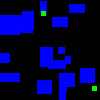

['map_436.png', '34', '40', '83', '83']


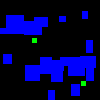

['map_437.png', '57', '86', '24', '23']


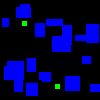

['map_438.png', '25', '52', '86', '24']


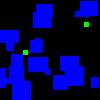

['map_439.png', '4', '89', '72', '69']


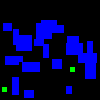

['map_440.png', '59', '30', '41', '94']


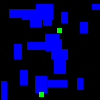

['map_441.png', '81', '51', '11', '70']


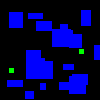

['map_442.png', '56', '11', '50', '91']


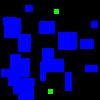

['map_443.png', '80', '5', '11', '75']


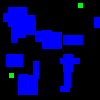

['map_444.png', '26', '6', '57', '69']


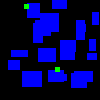

['map_445.png', '34', '48', '95', '20']


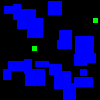

['map_446.png', '5', '89', '80', '5']


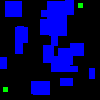

['map_447.png', '10', '61', '79', '34']


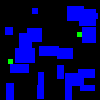

['map_448.png', '39', '74', '46', '8']


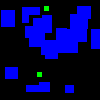

['map_449.png', '80', '45', '22', '93']


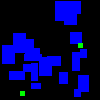

['map_450.png', '15', '31', '58', '91']


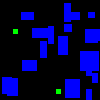

['map_451.png', '22', '44', '92', '74']


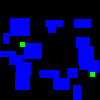

['map_452.png', '36', '22', '16', '93']


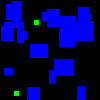

['map_453.png', '19', '87', '79', '38']


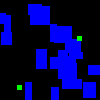

['map_454.png', '29', '89', '28', '7']


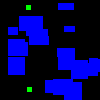

['map_455.png', '62', '85', '52', '4']


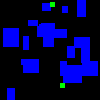

['map_456.png', '90', '36', '15', '54']


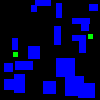

['map_457.png', '75', '45', '6', '3']


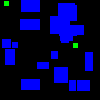

['map_458.png', '25', '56', '96', '95']


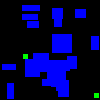

['map_459.png', '34', '76', '88', '3']


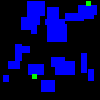

['map_460.png', '95', '8', '15', '79']


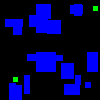

['map_461.png', '87', '86', '39', '25']


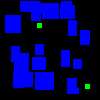

['map_462.png', '63', '93', '63', '6']


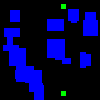

['map_463.png', '26', '78', '56', '18']


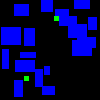

['map_464.png', '69', '73', '85', '5']


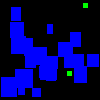

['map_465.png', '75', '5', '9', '16']


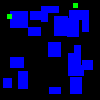

['map_466.png', '95', '96', '67', '17']


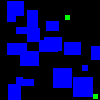

['map_467.png', '29', '26', '49', '91']


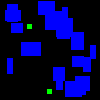

['map_468.png', '64', '6', '25', '79']


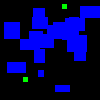

['map_469.png', '76', '91', '15', '24']


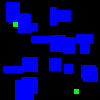

['map_470.png', '73', '92', '14', '13']


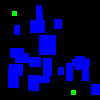

['map_471.png', '71', '11', '31', '92']


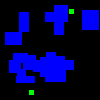

['map_472.png', '57', '68', '13', '7']


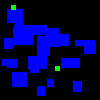

['map_473.png', '57', '28', '17', '95']


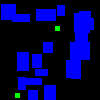

['map_474.png', '38', '78', '94', '43']


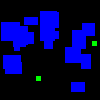

['map_475.png', '38', '16', '72', '83']


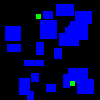

['map_476.png', '96', '10', '26', '14']


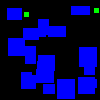

['map_477.png', '43', '91', '86', '18']


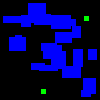

['map_478.png', '55', '43', '3', '87']


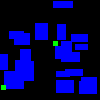

['map_479.png', '96', '25', '17', '90']


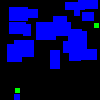

['map_480.png', '26', '93', '77', '15']


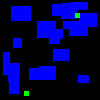

['map_481.png', '69', '60', '32', '5']


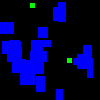

['map_482.png', '39', '85', '69', '26']


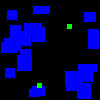

['map_483.png', '86', '96', '28', '31']


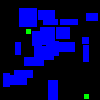

['map_484.png', '9', '13', '55', '79']


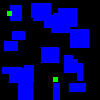

['map_485.png', '11', '65', '72', '94']


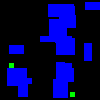

['map_486.png', '21', '62', '84', '19']


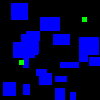

['map_487.png', '70', '45', '16', '91']


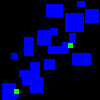

['map_488.png', '92', '63', '32', '29']


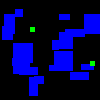

['map_489.png', '16', '55', '85', '93']


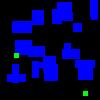

['map_490.png', '86', '81', '8', '56']


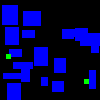

['map_491.png', '79', '88', '7', '11']


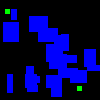

['map_492.png', '20', '53', '78', '15']


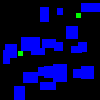

['map_493.png', '11', '61', '82', '48']


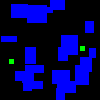

['map_494.png', '5', '78', '80', '91']


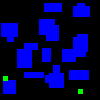

['map_495.png', '8', '40', '95', '40']


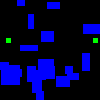

['map_496.png', '72', '42', '4', '57']


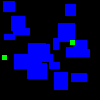

['map_497.png', '69', '68', '50', '3']


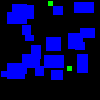

['map_498.png', '73', '60', '7', '19']


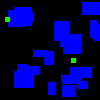

['map_499.png', '9', '3', '87', '87']


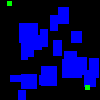

['map_500.png', '40', '23', '31', '90']


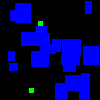

['map_501.png', '16', '34', '64', '93']


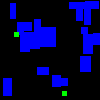

['map_502.png', '89', '42', '16', '80']


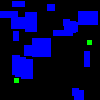

['map_503.png', '67', '7', '28', '93']


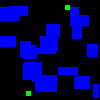

['map_504.png', '22', '38', '80', '84']


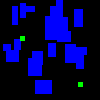

['map_505.png', '55', '78', '10', '24']


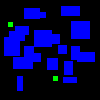

['map_506.png', '25', '44', '69', '94']


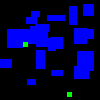

['map_507.png', '77', '6', '20', '78']


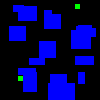

['map_508.png', '7', '64', '90', '3']


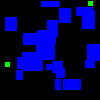

['map_509.png', '10', '60', '93', '32']


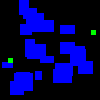

['map_510.png', '96', '14', '21', '31']


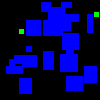

['map_511.png', '39', '7', '20', '79']


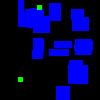

['map_512.png', '78', '15', '15', '49']


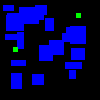

['map_513.png', '57', '76', '50', '8']


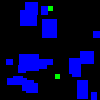

['map_514.png', '5', '50', '70', '80']


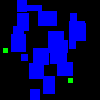

['map_515.png', '87', '61', '11', '30']


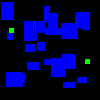

['map_516.png', '50', '58', '3', '11']


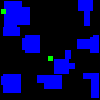

['map_517.png', '4', '26', '57', '94']


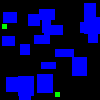

['map_518.png', '25', '68', '93', '63']


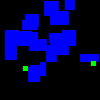

['map_519.png', '64', '65', '12', '15']


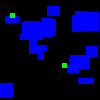

['map_520.png', '88', '14', '20', '27']


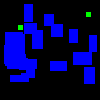

['map_521.png', '69', '92', '40', '33']


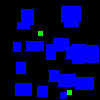

['map_522.png', '10', '28', '21', '96']


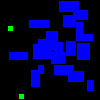

['map_523.png', '16', '7', '70', '51']


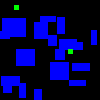

['map_524.png', '25', '83', '71', '37']


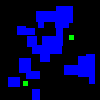

['map_525.png', '19', '93', '96', '37']


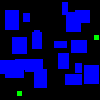

['map_526.png', '17', '35', '90', '55']


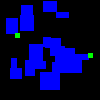

['map_527.png', '27', '77', '96', '19']


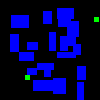

['map_528.png', '15', '3', '79', '70']


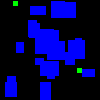

['map_529.png', '12', '5', '88', '73']


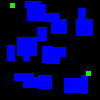

['map_530.png', '96', '63', '10', '12']


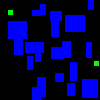

['map_531.png', '73', '64', '4', '69']


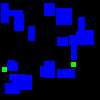

['map_532.png', '34', '8', '96', '89']


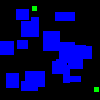

['map_533.png', '56', '41', '3', '80']


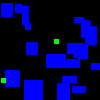

['map_534.png', '93', '49', '11', '77']


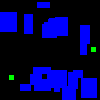

['map_535.png', '12', '4', '94', '5']


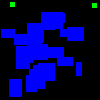

['map_536.png', '9', '77', '80', '56']


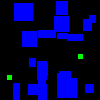

['map_537.png', '41', '81', '95', '14']


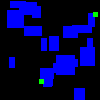

['map_538.png', '13', '71', '71', '8']


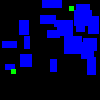

['map_539.png', '18', '36', '90', '70']


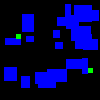

['map_540.png', '35', '16', '65', '92']


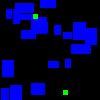

['map_541.png', '30', '72', '95', '96']


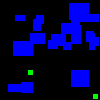

['map_542.png', '70', '65', '18', '3']


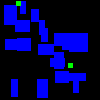

['map_543.png', '55', '81', '89', '13']


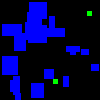

['map_544.png', '31', '91', '55', '25']


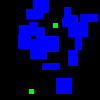

['map_545.png', '11', '34', '80', '94']


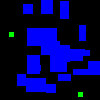

['map_546.png', '46', '67', '23', '4']


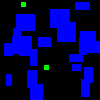

['map_547.png', '11', '16', '64', '59']


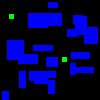

['map_548.png', '4', '55', '88', '92']


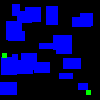

['map_549.png', '57', '81', '11', '20']


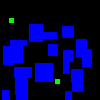

['map_550.png', '57', '95', '23', '37']


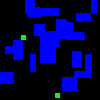

['map_551.png', '29', '3', '95', '58']


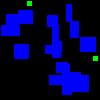

['map_552.png', '65', '6', '82', '71']


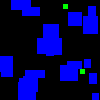

['map_553.png', '38', '71', '88', '3']


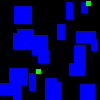

['map_554.png', '69', '79', '46', '14']


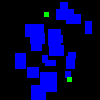

['map_555.png', '49', '57', '4', '9']


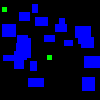

['map_556.png', '60', '25', '91', '96']


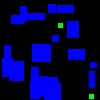

['map_557.png', '5', '49', '96', '52']


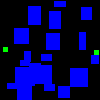

['map_558.png', '64', '47', '13', '94']


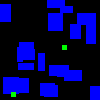

['map_559.png', '64', '27', '16', '81']


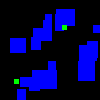

['map_560.png', '90', '64', '26', '9']


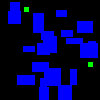

['map_561.png', '6', '10', '82', '81']


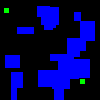

['map_562.png', '35', '43', '89', '6']


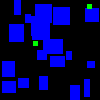

['map_563.png', '59', '20', '83', '91']


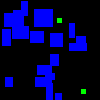

['map_564.png', '66', '85', '43', '16']


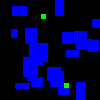

['map_565.png', '82', '70', '11', '48']


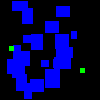

['map_566.png', '17', '26', '73', '82']


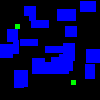

['map_567.png', '40', '93', '6', '31']


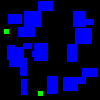

['map_568.png', '54', '80', '80', '17']


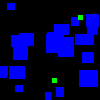

['map_569.png', '67', '91', '68', '23']


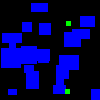

['map_570.png', '43', '47', '93', '94']


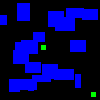

['map_571.png', '77', '24', '61', '92']


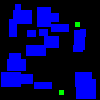

['map_572.png', '6', '55', '91', '25']


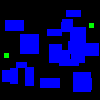

['map_573.png', '4', '84', '76', '52']


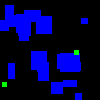

['map_574.png', '58', '76', '64', '3']


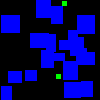

['map_575.png', '49', '53', '94', '6']


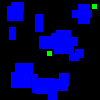

['map_576.png', '95', '59', '38', '92']


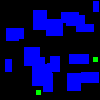

['map_577.png', '82', '88', '5', '22']


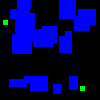

['map_578.png', '85', '11', '6', '20']


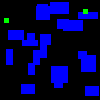

['map_579.png', '45', '15', '84', '95']


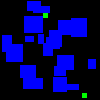

['map_580.png', '12', '69', '71', '13']


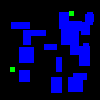

['map_581.png', '34', '34', '91', '71']


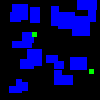

['map_582.png', '52', '42', '6', '93']


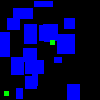

['map_583.png', '15', '90', '88', '14']


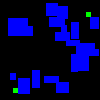

['map_584.png', '32', '55', '84', '4']


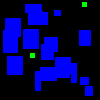

['map_585.png', '33', '12', '3', '85']


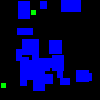

['map_586.png', '28', '30', '84', '94']


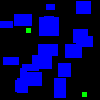

['map_587.png', '6', '62', '85', '25']


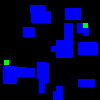

['map_588.png', '35', '15', '95', '49']


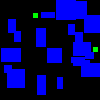

['map_589.png', '17', '27', '69', '90']


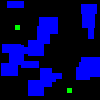

['map_590.png', '3', '41', '85', '47']


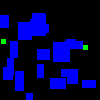

['map_591.png', '17', '87', '19', '3']


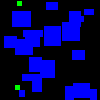

['map_592.png', '7', '79', '71', '91']


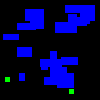

['map_593.png', '71', '44', '4', '75']


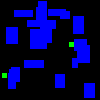

['map_594.png', '22', '6', '92', '13']


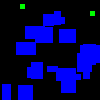

['map_595.png', '67', '52', '18', '9']


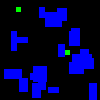

['map_596.png', '25', '12', '11', '81']


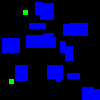

['map_597.png', '41', '86', '93', '28']


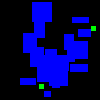

['map_598.png', '84', '82', '6', '41']


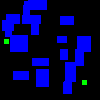

['map_599.png', '73', '65', '7', '75']


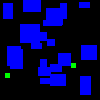

['map_600.png', '15', '72', '65', '3']


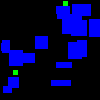

['map_601.png', '69', '22', '38', '81']


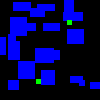

['map_602.png', '42', '43', '96', '4']


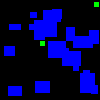

['map_603.png', '94', '14', '5', '28']


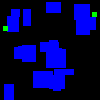

['map_604.png', '86', '65', '17', '85']


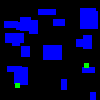

['map_605.png', '51', '5', '84', '94']


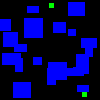

['map_606.png', '81', '39', '17', '51']


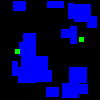

['map_607.png', '76', '50', '10', '81']


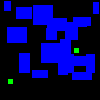

['map_608.png', '8', '18', '77', '65']


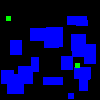

['map_609.png', '48', '8', '19', '91']


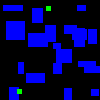

['map_610.png', '37', '42', '80', '96']


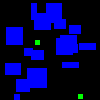

['map_611.png', '38', '75', '70', '8']


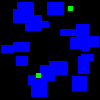

['map_612.png', '14', '54', '84', '69']


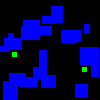

['map_613.png', '30', '85', '95', '87']


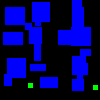

['map_614.png', '81', '96', '18', '61']


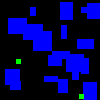

['map_615.png', '65', '67', '27', '8']


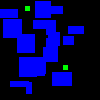

['map_616.png', '11', '6', '42', '81']


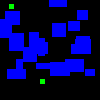

['map_617.png', '67', '52', '4', '85']


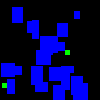

['map_618.png', '85', '28', '54', '91']


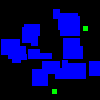

['map_619.png', '28', '56', '85', '90']


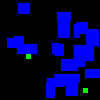

['map_620.png', '85', '56', '5', '37']


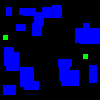

['map_621.png', '34', '14', '73', '91']


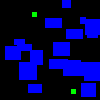

['map_622.png', '24', '58', '91', '32']


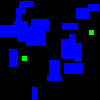

['map_623.png', '37', '67', '69', '7']


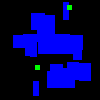

['map_624.png', '69', '89', '83', '3']


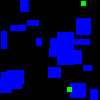

['map_625.png', '93', '49', '18', '77']


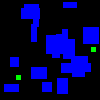

['map_626.png', '89', '80', '34', '42']


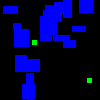

['map_627.png', '92', '58', '28', '84']


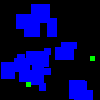

['map_628.png', '45', '96', '93', '49']


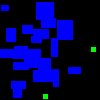

['map_629.png', '36', '12', '94', '61']


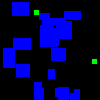

['map_630.png', '31', '66', '93', '33']


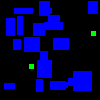

['map_631.png', '34', '70', '85', '11']


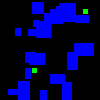

['map_632.png', '3', '51', '69', '56']


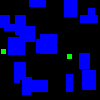

['map_633.png', '4', '8', '83', '16']


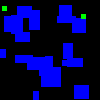

['map_634.png', '70', '61', '9', '26']


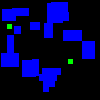

['map_635.png', '69', '45', '5', '71']


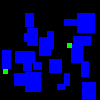

['map_636.png', '85', '19', '16', '13']


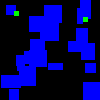

['map_637.png', '9', '57', '74', '18']


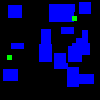

['map_638.png', '6', '39', '75', '95']


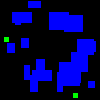

['map_639.png', '19', '17', '60', '87']


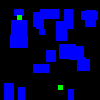

['map_640.png', '14', '80', '94', '7']


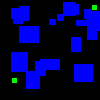

['map_641.png', '65', '22', '29', '95']


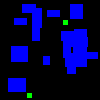

['map_642.png', '16', '80', '63', '32']


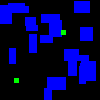

['map_643.png', '78', '9', '82', '85']


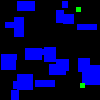

['map_644.png', '35', '34', '88', '92']


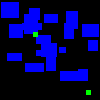

['map_645.png', '5', '76', '96', '39']


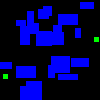

['map_646.png', '46', '29', '15', '88']


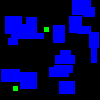

['map_647.png', '59', '40', '4', '3']


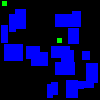

['map_648.png', '8', '39', '84', '47']


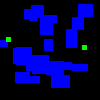

['map_649.png', '13', '81', '36', '17']


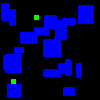

['map_650.png', '72', '89', '38', '16']


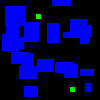

['map_651.png', '29', '83', '44', '19']


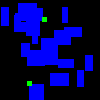

['map_652.png', '21', '61', '82', '30']


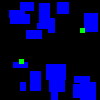

['map_653.png', '21', '64', '89', '26']


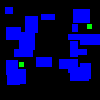

['map_654.png', '78', '88', '37', '11']


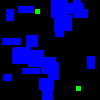

['map_655.png', '15', '19', '66', '92']


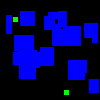

['map_656.png', '6', '38', '81', '34']


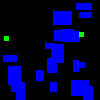

['map_657.png', '60', '94', '24', '19']


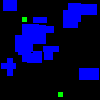

['map_658.png', '53', '46', '7', '95']


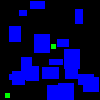

['map_659.png', '80', '51', '5', '23']


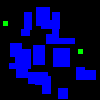

['map_660.png', '87', '80', '10', '35']


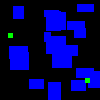

['map_661.png', '56', '38', '5', '95']


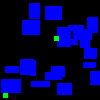

['map_662.png', '80', '5', '63', '74']


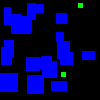

['map_663.png', '36', '68', '93', '16']


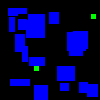

['map_664.png', '30', '89', '27', '7']


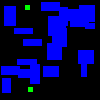

['map_665.png', '13', '45', '90', '91']


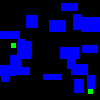

['map_666.png', '19', '90', '13', '6']


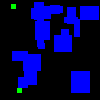

['map_667.png', '91', '51', '17', '80']


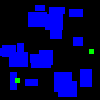

['map_668.png', '56', '84', '14', '16']


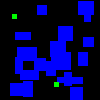

['map_669.png', '78', '19', '7', '19']


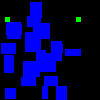

['map_670.png', '26', '81', '84', '17']


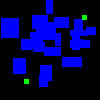

['map_671.png', '35', '41', '96', '83']


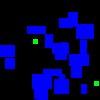

['map_672.png', '70', '12', '3', '61']


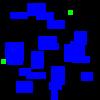

['map_673.png', '51', '17', '8', '80']


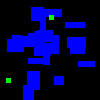

['map_674.png', '92', '51', '30', '4']


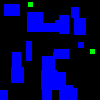

['map_675.png', '5', '12', '94', '35']


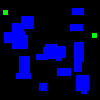

['map_676.png', '65', '88', '61', '17']


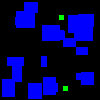

['map_677.png', '96', '79', '42', '4']


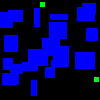

['map_678.png', '40', '47', '90', '91']


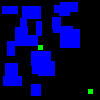

['map_679.png', '6', '54', '70', '30']


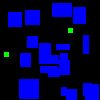

['map_680.png', '44', '12', '36', '86']


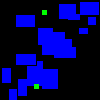

['map_681.png', '91', '11', '3', '59']


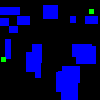

['map_682.png', '59', '65', '92', '6']


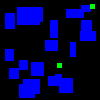

['map_683.png', '4', '58', '84', '60']


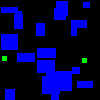

['map_684.png', '5', '67', '74', '84']


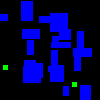

['map_685.png', '95', '69', '37', '39']


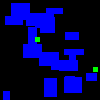

['map_686.png', '20', '58', '84', '95']


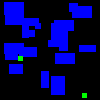

['map_687.png', '16', '8', '93', '81']


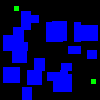

['map_688.png', '85', '58', '4', '18']


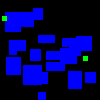

['map_689.png', '93', '86', '63', '17']


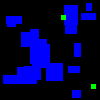

['map_690.png', '78', '45', '6', '32']


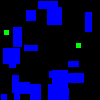

['map_691.png', '10', '82', '45', '8']


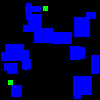

['map_692.png', '88', '69', '8', '17']


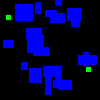

['map_693.png', '74', '24', '4', '10']


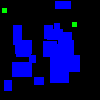

['map_694.png', '92', '17', '11', '41']


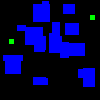

['map_695.png', '88', '27', '37', '73']


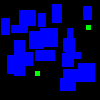

['map_696.png', '59', '40', '17', '93']


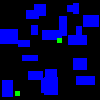

['map_697.png', '20', '82', '69', '22']


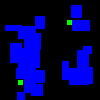

['map_698.png', '96', '36', '22', '24']


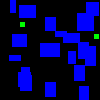

['map_699.png', '34', '36', '81', '92']


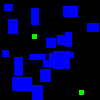

['map_700.png', '48', '48', '95', '93']


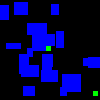

['map_701.png', '86', '48', '3', '37']


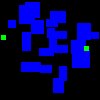

['map_702.png', '88', '33', '5', '21']


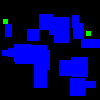

['map_703.png', '64', '68', '21', '7']


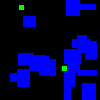

['map_704.png', '8', '67', '96', '16']


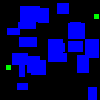

['map_705.png', '64', '88', '4', '55']


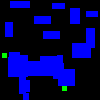

['map_706.png', '27', '8', '64', '69']


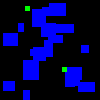

['map_707.png', '47', '33', '92', '95']


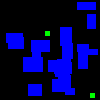

['map_708.png', '48', '71', '4', '22']


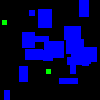

['map_709.png', '42', '20', '85', '83']


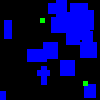

['map_710.png', '76', '6', '16', '42']


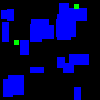

['map_711.png', '91', '40', '27', '80']


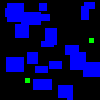

['map_712.png', '93', '28', '5', '19']


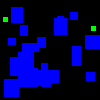

['map_713.png', '87', '22', '38', '84']


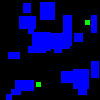

['map_714.png', '90', '35', '38', '91']


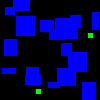

['map_715.png', '78', '94', '28', '12']


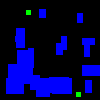

['map_716.png', '72', '72', '10', '41']


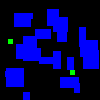

['map_717.png', '27', '37', '95', '16']


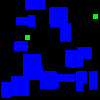

['map_718.png', '69', '31', '4', '74']


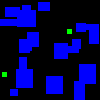

['map_719.png', '34', '7', '59', '92']


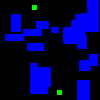

['map_720.png', '28', '14', '60', '95']


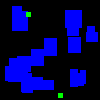

['map_721.png', '54', '49', '3', '7']


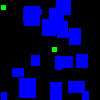

['map_722.png', '47', '33', '93', '90']


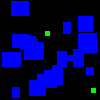

['map_723.png', '91', '86', '52', '17']


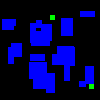

['map_724.png', '57', '88', '9', '38']


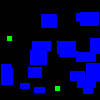

['map_725.png', '58', '42', '5', '82']


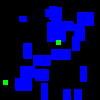

['map_726.png', '20', '76', '87', '7']


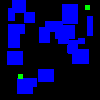

['map_727.png', '90', '94', '5', '62']


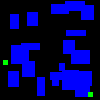

['map_728.png', '65', '37', '22', '90']


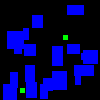

['map_729.png', '31', '8', '9', '78']


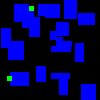

['map_730.png', '90', '20', '72', '92']


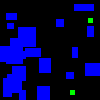

['map_731.png', '6', '81', '28', '4']


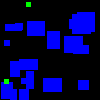

['map_732.png', '94', '50', '26', '13']


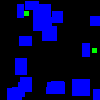

['map_733.png', '69', '29', '31', '96']


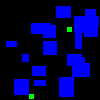

['map_734.png', '3', '96', '81', '74']


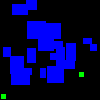

['map_735.png', '37', '20', '96', '69']


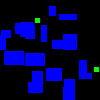

['map_736.png', '13', '83', '81', '14']


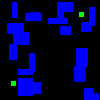

['map_737.png', '68', '49', '8', '4']


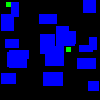

['map_738.png', '56', '61', '19', '5']


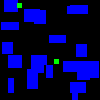

['map_739.png', '84', '94', '10', '86']


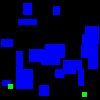

['map_740.png', '24', '20', '48', '84']


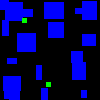

['map_741.png', '6', '21', '92', '35']


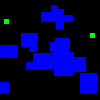

['map_742.png', '18', '29', '67', '95']


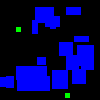

['map_743.png', '57', '58', '10', '6']


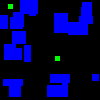

['map_744.png', '65', '65', '6', '37']


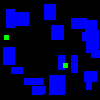

['map_745.png', '38', '69', '85', '20']


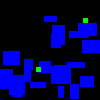

['map_746.png', '16', '34', '96', '41']


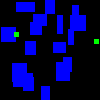

['map_747.png', '72', '26', '22', '78']


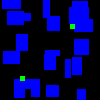

['map_748.png', '9', '79', '85', '29']


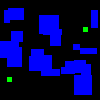

['map_749.png', '78', '59', '4', '55']


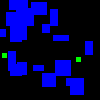

['map_750.png', '16', '45', '92', '36']


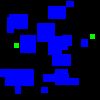

['map_751.png', '85', '20', '7', '51']


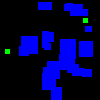

['map_752.png', '95', '52', '6', '5']


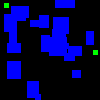

['map_753.png', '84', '78', '27', '35']


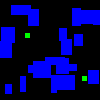

['map_754.png', '56', '56', '14', '4']


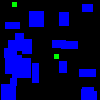

['map_755.png', '79', '95', '68', '5']


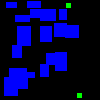

['map_756.png', '42', '86', '93', '34']


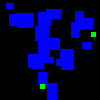

['map_757.png', '66', '4', '43', '83']


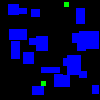

['map_758.png', '47', '79', '81', '3']


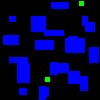

['map_759.png', '14', '39', '78', '73']


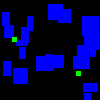

['map_760.png', '94', '63', '26', '49']


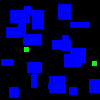

['map_761.png', '20', '66', '96', '79']


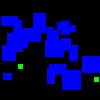

['map_762.png', '91', '92', '96', '17']


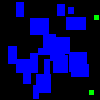

['map_763.png', '38', '14', '91', '52']


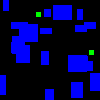

['map_764.png', '37', '72', '93', '7']


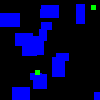

['map_765.png', '82', '63', '18', '92']


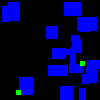

['map_766.png', '93', '60', '13', '32']


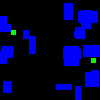

['map_767.png', '84', '61', '4', '69']


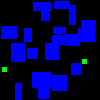

['map_768.png', '70', '4', '17', '80']


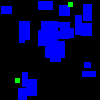

['map_769.png', '55', '31', '11', '86']


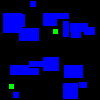

['map_770.png', '40', '22', '17', '87']


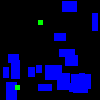

['map_771.png', '84', '39', '26', '83']


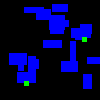

['map_772.png', '37', '79', '80', '11']


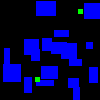

['map_773.png', '33', '66', '78', '13']


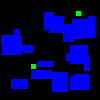

['map_774.png', '57', '21', '14', '79']


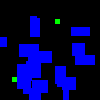

['map_775.png', '52', '85', '72', '10']


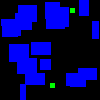

['map_776.png', '45', '3', '36', '82']


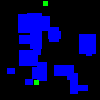

['map_777.png', '55', '78', '37', '11']


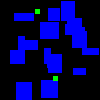

['map_778.png', '4', '32', '95', '37']


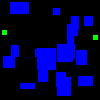

['map_779.png', '43', '10', '57', '82']


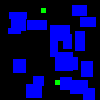

['map_780.png', '9', '41', '85', '49']


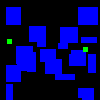

['map_781.png', '46', '42', '83', '96']


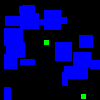

['map_782.png', '55', '8', '88', '77']


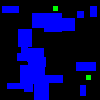

['map_783.png', '68', '87', '93', '7']


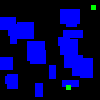

['map_784.png', '4', '77', '35', '9']


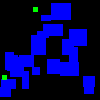

['map_785.png', '74', '3', '44', '70']


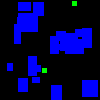

['map_786.png', '86', '96', '40', '10']


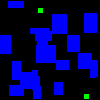

['map_787.png', '58', '71', '94', '6']


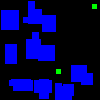

['map_788.png', '76', '4', '46', '71']


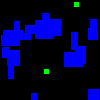

['map_789.png', '93', '38', '17', '90']


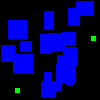

['map_790.png', '72', '49', '5', '95']


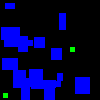

['map_791.png', '74', '27', '25', '87']


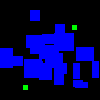

['map_792.png', '34', '63', '82', '13']


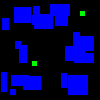

['map_793.png', '44', '46', '94', '94']


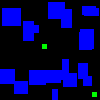

['map_794.png', '91', '24', '24', '79']


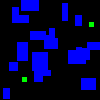

['map_795.png', '4', '70', '73', '57']


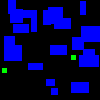

['map_796.png', '94', '76', '13', '93']


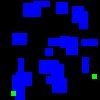

['map_797.png', '22', '90', '94', '12']


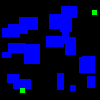

['map_798.png', '73', '46', '5', '54']


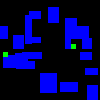

['map_799.png', '86', '55', '14', '82']


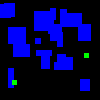

['map_800.png', '7', '6', '80', '83']


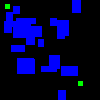

['map_801.png', '78', '82', '63', '4']


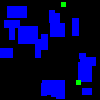

['map_802.png', '15', '66', '58', '11']


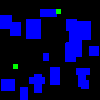

['map_803.png', '5', '70', '74', '8']


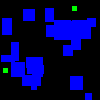

['map_804.png', '7', '4', '74', '12']


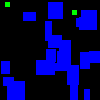

['map_805.png', '78', '63', '9', '35']


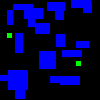

['map_806.png', '13', '73', '78', '67']


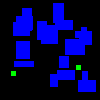

['map_807.png', '93', '62', '9', '18']


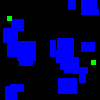

['map_808.png', '80', '18', '21', '49']


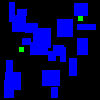

['map_809.png', '95', '66', '58', '10']


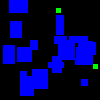

['map_810.png', '68', '15', '13', '81']


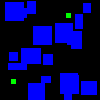

['map_811.png', '40', '78', '95', '42']


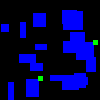

['map_812.png', '24', '5', '94', '35']


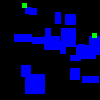

['map_813.png', '71', '44', '3', '60']


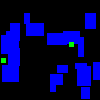

['map_814.png', '37', '50', '85', '94']


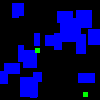

['map_815.png', '18', '9', '86', '84']


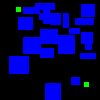

['map_816.png', '60', '79', '11', '9']


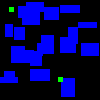

['map_817.png', '30', '89', '79', '26']


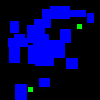

['map_818.png', '57', '55', '11', '7']


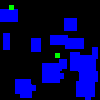

['map_819.png', '34', '23', '79', '96']


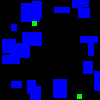

['map_820.png', '42', '76', '96', '4']


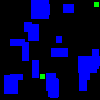

['map_821.png', '92', '24', '18', '71']


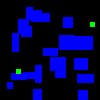

['map_822.png', '20', '95', '62', '11']


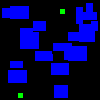

['map_823.png', '7', '51', '59', '96']


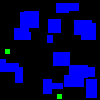

['map_824.png', '31', '71', '87', '30']


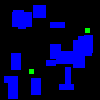

['map_825.png', '87', '4', '34', '46']


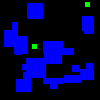

['map_826.png', '47', '57', '87', '4']


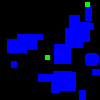

['map_827.png', '93', '85', '44', '3']


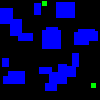

['map_828.png', '70', '46', '9', '76']


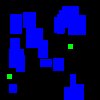

['map_829.png', '74', '10', '78', '84']


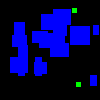

['map_830.png', '28', '38', '72', '88']


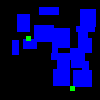

['map_831.png', '33', '45', '91', '7']


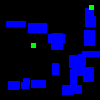

['map_832.png', '43', '87', '68', '4']


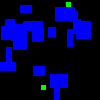

['map_833.png', '32', '94', '87', '48']


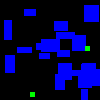

['map_834.png', '92', '96', '16', '33']


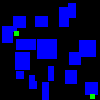

['map_835.png', '56', '55', '3', '10']


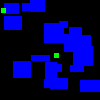

['map_836.png', '36', '46', '86', '95']


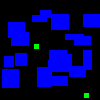

['map_837.png', '54', '24', '89', '91']


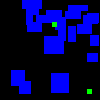

['map_838.png', '4', '62', '42', '8']


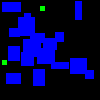

['map_839.png', '92', '28', '46', '81']


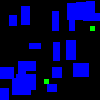

['map_840.png', '3', '57', '96', '73']


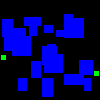

['map_841.png', '55', '60', '3', '4']


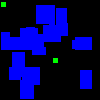

['map_842.png', '60', '89', '69', '5']


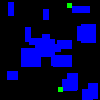

['map_843.png', '46', '60', '94', '16']


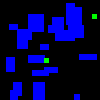

['map_844.png', '51', '87', '37', '10']


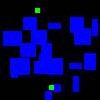

['map_845.png', '66', '10', '18', '67']


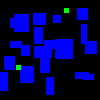

['map_846.png', '58', '7', '57', '77']


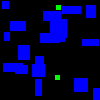

['map_847.png', '12', '25', '11', '93']


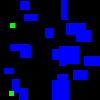

['map_848.png', '16', '88', '93', '90']


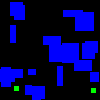

['map_849.png', '30', '32', '90', '67']


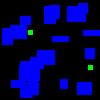

['map_850.png', '70', '85', '42', '12']


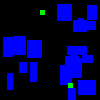

['map_851.png', '11', '26', '84', '25']


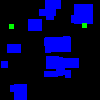

['map_852.png', '46', '58', '3', '5']


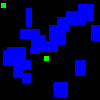

['map_853.png', '63', '57', '3', '4']


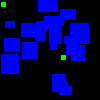

['map_854.png', '94', '55', '26', '27']


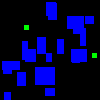

['map_855.png', '38', '40', '76', '96']


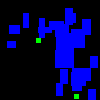

['map_856.png', '88', '59', '3', '68']


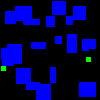

['map_857.png', '39', '82', '15', '5']


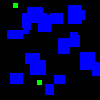

['map_858.png', '91', '79', '6', '55']


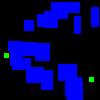

['map_859.png', '30', '81', '89', '6']


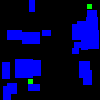

['map_860.png', '75', '33', '8', '21']


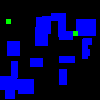

['map_861.png', '42', '64', '78', '7']


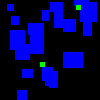

['map_862.png', '85', '18', '20', '22']


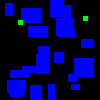

['map_863.png', '19', '40', '83', '19']


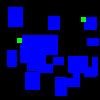

['map_864.png', '39', '33', '88', '81']


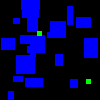

['map_865.png', '57', '57', '4', '4']


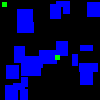

['map_866.png', '54', '42', '6', '89']


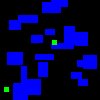

['map_867.png', '88', '22', '4', '92']


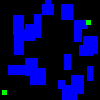

['map_868.png', '49', '38', '94', '94']


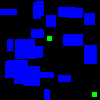

['map_869.png', '82', '67', '4', '4']


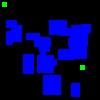

['map_870.png', '6', '40', '83', '36']


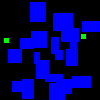

['map_871.png', '22', '11', '4', '78']


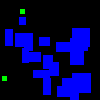

['map_872.png', '71', '24', '8', '61']


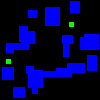

['map_873.png', '48', '79', '94', '15']


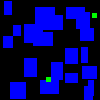

['map_874.png', '32', '8', '14', '77']


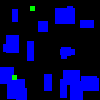

['map_875.png', '17', '7', '59', '58']


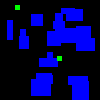

['map_876.png', '77', '90', '60', '17']


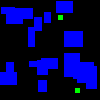

['map_877.png', '75', '34', '42', '94']


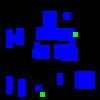

['map_878.png', '5', '65', '92', '96']


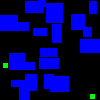

['map_879.png', '94', '77', '49', '16']


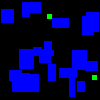

['map_880.png', '31', '13', '75', '88']


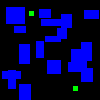

['map_881.png', '71', '41', '13', '85']


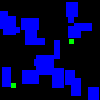

['map_882.png', '20', '48', '84', '91']


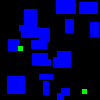

['map_883.png', '62', '19', '40', '95']


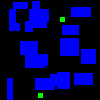

['map_884.png', '44', '3', '87', '75']


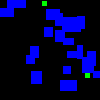

['map_885.png', '40', '77', '89', '31']


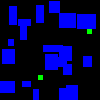

['map_886.png', '13', '69', '96', '93']


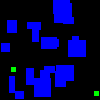

['map_887.png', '96', '21', '5', '4']


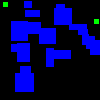

['map_888.png', '23', '52', '94', '23']


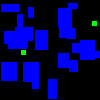

['map_889.png', '75', '72', '77', '7']


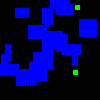

['map_890.png', '60', '11', '3', '88']


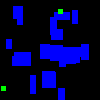

['map_891.png', '50', '79', '28', '15']


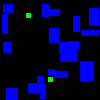

['map_892.png', '93', '91', '22', '89']


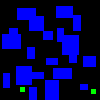

['map_893.png', '92', '87', '55', '12']


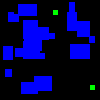

['map_894.png', '21', '71', '76', '31']


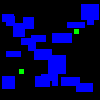

['map_895.png', '11', '59', '96', '12']


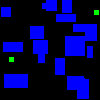

['map_896.png', '4', '48', '88', '47']


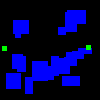

['map_897.png', '43', '95', '62', '24']


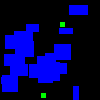

['map_898.png', '86', '66', '16', '18']


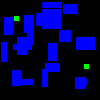

['map_899.png', '78', '3', '32', '55']


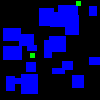

['map_900.png', '63', '87', '43', '5']


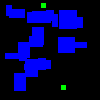

['map_901.png', '74', '3', '71', '91']


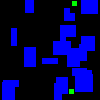

['map_902.png', '27', '24', '46', '95']


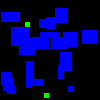

['map_903.png', '95', '48', '9', '78']


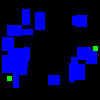

['map_904.png', '89', '13', '26', '95']


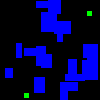

['map_905.png', '5', '21', '88', '92']


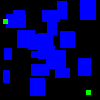

['map_906.png', '63', '34', '17', '81']


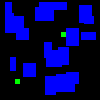

['map_907.png', '54', '8', '80', '93']


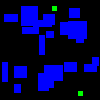

['map_908.png', '92', '43', '8', '49']


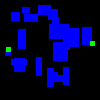

['map_909.png', '76', '68', '15', '33']


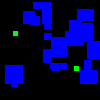

['map_910.png', '60', '55', '5', '94']


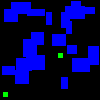

['map_911.png', '29', '11', '96', '5']


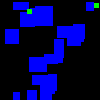

['map_912.png', '30', '41', '87', '93']


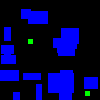

['map_913.png', '88', '3', '10', '82']


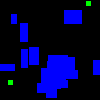

['map_914.png', '41', '74', '80', '4']


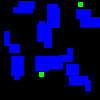

['map_915.png', '14', '35', '94', '96']


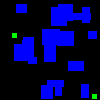

['map_916.png', '92', '19', '25', '72']


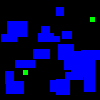

['map_917.png', '81', '83', '10', '82']


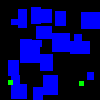

['map_918.png', '22', '55', '93', '69']


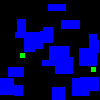

['map_919.png', '62', '24', '86', '86']


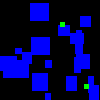

['map_920.png', '35', '38', '87', '92']


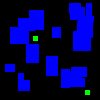

['map_921.png', '91', '4', '53', '95']


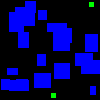

['map_922.png', '9', '61', '83', '71']


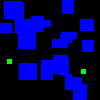

['map_923.png', '26', '16', '12', '85']


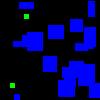

['map_924.png', '90', '33', '7', '29']


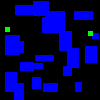

['map_925.png', '20', '37', '64', '87']


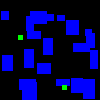

['map_926.png', '94', '20', '30', '59']


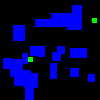

['map_927.png', '33', '9', '51', '93']


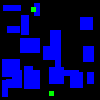

['map_928.png', '54', '55', '9', '3']


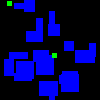

['map_929.png', '42', '4', '85', '61']


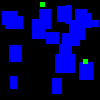

['map_930.png', '35', '60', '92', '27']


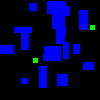

['map_931.png', '92', '52', '24', '55']


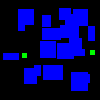

['map_932.png', '18', '40', '90', '72']


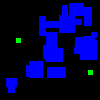

['map_933.png', '75', '11', '45', '91']


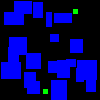

['map_934.png', '6', '73', '61', '20']


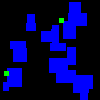

['map_935.png', '19', '87', '73', '37']


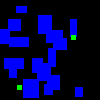

['map_936.png', '18', '78', '53', '10']


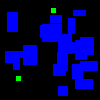

['map_937.png', '89', '81', '82', '12']


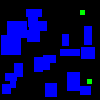

['map_938.png', '73', '25', '27', '96']


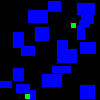

['map_939.png', '96', '82', '8', '32']


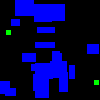

['map_940.png', '22', '71', '83', '31']


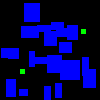

['map_941.png', '6', '84', '67', '60']


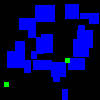

['map_942.png', '96', '18', '48', '80']


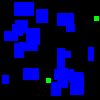

['map_943.png', '94', '18', '19', '93']


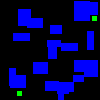

['map_944.png', '15', '95', '93', '75']


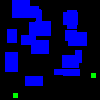

['map_945.png', '59', '37', '87', '96']


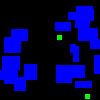

['map_946.png', '83', '11', '18', '90']


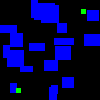

['map_947.png', '33', '95', '35', '8']


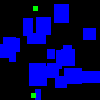

['map_948.png', '67', '11', '5', '39']


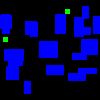

['map_949.png', '90', '69', '27', '91']


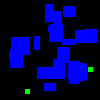

['map_950.png', '38', '31', '10', '90']


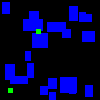

['map_951.png', '86', '3', '7', '30']


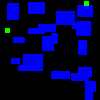

['map_952.png', '17', '7', '45', '69']


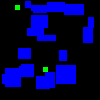

['map_953.png', '58', '31', '74', '95']


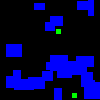

['map_954.png', '64', '28', '95', '87']


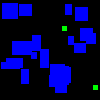

['map_955.png', '43', '8', '91', '67']


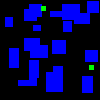

['map_956.png', '88', '83', '17', '20']


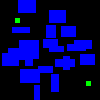

['map_957.png', '45', '89', '62', '9']


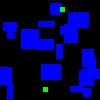

['map_958.png', '10', '11', '82', '11']


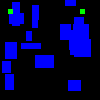

['map_959.png', '61', '9', '15', '88']


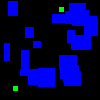

['map_960.png', '66', '79', '41', '3']


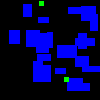

['map_961.png', '63', '58', '4', '6']


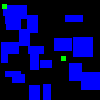

['map_962.png', '33', '45', '94', '7']


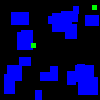

['map_963.png', '37', '21', '87', '85']


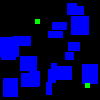

['map_964.png', '11', '86', '82', '76']


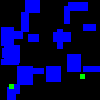

['map_965.png', '48', '79', '93', '23']


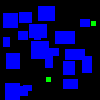

['map_966.png', '37', '72', '70', '3']


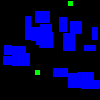

['map_967.png', '14', '11', '95', '45']


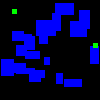

['map_968.png', '72', '10', '94', '72']


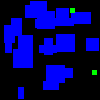

['map_969.png', '91', '73', '19', '65']


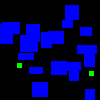

['map_970.png', '6', '40', '73', '6']


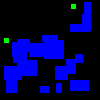

['map_971.png', '21', '80', '84', '14']


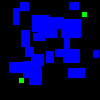

['map_972.png', '92', '17', '8', '62']


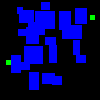

['map_973.png', '33', '61', '96', '43']


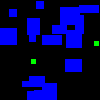

['map_974.png', '70', '27', '49', '91']


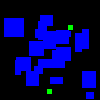

['map_975.png', '12', '56', '96', '50']


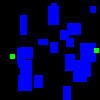

['map_976.png', '95', '78', '84', '6']


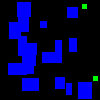

['map_977.png', '55', '94', '37', '8']


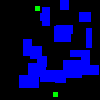

['map_978.png', '3', '33', '87', '79']


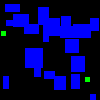

['map_979.png', '19', '23', '88', '44']


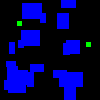

['map_980.png', '6', '76', '28', '3']


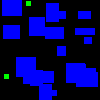

['map_981.png', '22', '38', '94', '81']


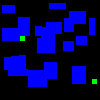

['map_982.png', '60', '85', '91', '3']


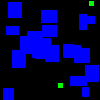

['map_983.png', '12', '8', '88', '94']


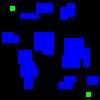

['map_984.png', '52', '40', '96', '93']


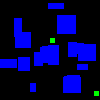

['map_985.png', '25', '19', '75', '89']


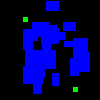

['map_986.png', '90', '46', '27', '69']


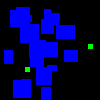

['map_987.png', '7', '51', '71', '65']


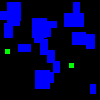

['map_988.png', '18', '79', '90', '93']


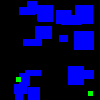

['map_989.png', '51', '27', '11', '86']


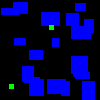

['map_990.png', '50', '7', '20', '76']


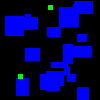

['map_991.png', '86', '61', '8', '5']


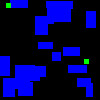

['map_992.png', '94', '70', '16', '86']


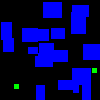

['map_993.png', '57', '36', '22', '96']


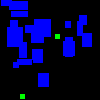

['map_994.png', '61', '13', '31', '94']


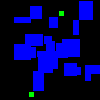

['map_995.png', '81', '61', '7', '29']


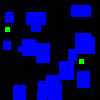

['map_996.png', '8', '46', '88', '90']


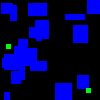

['map_997.png', '20', '83', '89', '86']


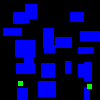

['map_998.png', '60', '26', '4', '75']


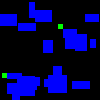

['map_999.png', '75', '53', '15', '88']


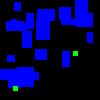

In [50]:
maps_count = 1000
maps_data = [['map name','start x','start y','end x','end y']]

for n in range(maps_count):
  # image size
  map_width = 100
  map_height = 100
  map_size = [map_width, map_height]
  
  # generate empty image
  img = np.ones((map_width, map_height, 3), np.uint8)*0

  # create obstacles
  rect_count = 20
  rect_min = 5
  rect_max = 20
  for i in range(rect_count):
    rect_width = np.random.randint(low = rect_min, high = rect_max, size = 1)
    rect_heigth = np.random.randint(low = rect_min, high = rect_max, size = 1)
    pos = np.random.randint(low = 0, high = map_width-rect_width, size = 4)
    create_rect(img, pos[0], pos[1], rect_width, rect_heigth)

  # create start and end points
  start_x_pos, start_y_pos = create_start_point(img, map_size)
  end_x_pos, end_y_pos = create_end_point(img, start_x_pos, start_y_pos, map_size, min_distance=65)

  # create map name
  map_data = ['map_'+str(n)+'.png', str(start_x_pos), str(start_y_pos), str(end_x_pos), str(end_y_pos)]
  maps_data.append(map_data)
  print(map_data)
  cv2_imshow(img)

  # save image
  if not cv2.imwrite('drive/MyDrive/Colab/Semestr_4/planowanie_ruchu/maps2/map_'+str(n)+'.png', img):
    raise Exception('Could not write image')

In [51]:
import csv

filename = 'drive/MyDrive/Colab/Semestr_4/planowanie_ruchu/maps2/maps_coordinates.csv'
with open(filename, 'w') as csvfile:
  writer = csv.writer(csvfile)
  writer.writerows(maps_data)